# Notebook 3: Classification using CNN

In this notebook, we will use a CNN model to classify the images, following the approach used in the following [paper](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

---

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the images and labels back from the saved NumPy files
all_images_np = np.load('all_images.npy')  # Load image data
all_labels_np = np.load('all_labels.npy')  # Load label data

print("Data loaded successfully from NumPy files.")

Data loaded successfully from NumPy files.


#### Convert Labels to Integer Format

In [2]:
# Create a mapping from string labels to integer labels
label_mapping = {'Blurry': 0, 'Corrupt': 1, 'Missing_Data': 2, 'Noisy': 3, 'Priority': 4}

# Convert string labels to integers using the mapping
all_labels_np = np.array([label_mapping[label] for label in all_labels_np])

print("Labels converted to integer format.")

Labels converted to integer format.


---

### Step 2: Split the Data into Training and Validation Sets


In [3]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and validation sets

# Split the data: 80% training, 20% validation
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images_np, all_labels_np, test_size=0.2, random_state=42
)

print(f"Training data: {len(train_images)} images")
print(f"Validation data: {len(val_images)} images")

Training data: 12948 images
Validation data: 3237 images


---

### Train CubeCatNet CNN mdoel

We will define and train a Convolutional Neural Network (CNN) model that was defined in [link](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Importing Sequential to build the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense  # Importing necessary layers for the CNN
from tensorflow.keras.utils import to_categorical  # Importing utility for converting labels to categorical format

# Set the number of threads used for intra-op parallelism (within individual operations)
# tf.config.threading.set_intra_op_parallelism_threads(5)

# # Set the number of threads used for inter-op parallelism (between operations)
# tf.config.threading.set_inter_op_parallelism_threads(5)

# Convert labels to categorical format for training
train_labels_cat = to_categorical(train_labels)
val_labels_cat = to_categorical(val_labels)

# Define the CNN model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(512, 512, 3)),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(5, activation='softmax')  # Output layer with 5 neurons (one for each class) + Softmax activation
])

# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model defined and compiled successfully.")

# Train the model on the training data
history = model.fit(
    train_images, train_labels_cat,
    epochs=10,  # Number of epochs
    batch_size=64,  # Batch size
    validation_data=(val_images, val_labels_cat)  # Validation data
)

print("Model training complete.")

2024-08-24 17:08:56.026289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 17:08:56.033249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 17:08:56.048922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 17:08:56.073016: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 17:08:56.080272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 17:08:56.100593: I tensorflow/core/platform/cpu_feature_gu

Model defined and compiled successfully.
Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 730s 4s/step - accuracy: 0.6452 - loss: 1.7097 - val_accuracy: 0.9778 - val_loss: 0.0870
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 738s 4s/step - accuracy: 0.9854 - loss: 0.0662 - val_accuracy: 0.9373 - val_loss: 0.4082
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.9782 - loss: 0.1131 - val_accuracy: 0.9969 - val_loss: 0.0152
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 742s 4s/step - accuracy: 0.9961 - loss: 0.0177 - val_accuracy: 0.9947 - val_loss: 0.0172
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 722s 4s/step - accuracy: 0.9952 - loss: 0.0165 - val_accuracy: 0.9901 - val_loss: 0.0344
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 730s 4s/step - accuracy: 0.9961 - loss: 0.0155 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9978 - val_loss: 0.0060
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 740s 4s/step - a

---

### Perfomrmance Evaluation

- Confusion Matrix: Provides a visual representation of the model’s performance across all classes, showing the number of correct and incorrect predictions for each class.

102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step


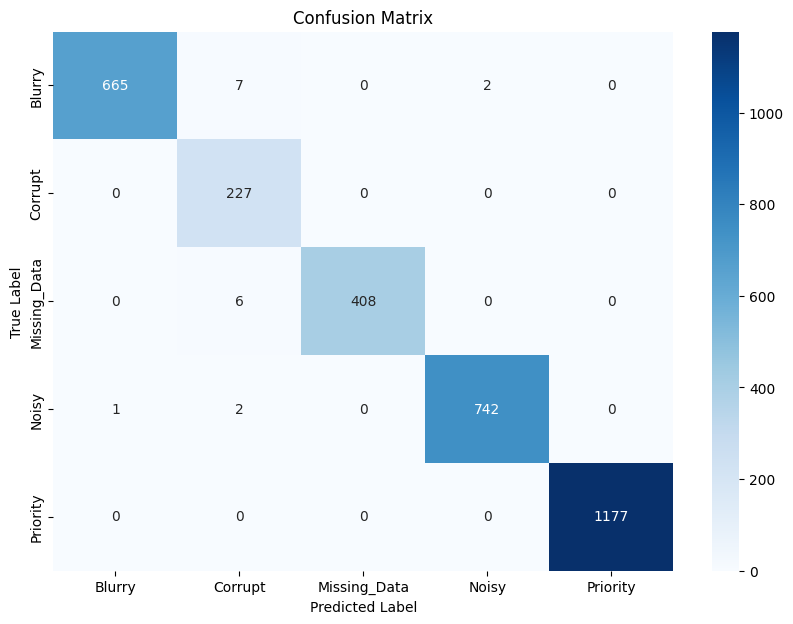

In [11]:
from sklearn.metrics import confusion_matrix, classification_report  # Importing necessary metrics for evaluation
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for better visualizations

# Predict the classes of the validation set
val_predictions = model.predict(val_images)
val_pred_classes = np.argmax(val_predictions, axis=1)  # Convert predicted probabilities to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


- Classification Report: Shows precision, recall, and F1-score for each class, giving a more detailed evaluation of model performance.


In [13]:
# Generate classification report
class_report = classification_report(val_labels, val_pred_classes, target_names=label_mapping.keys())
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Blurry       1.00      0.99      0.99       674
     Corrupt       0.94      1.00      0.97       227
Missing_Data       1.00      0.99      0.99       414
       Noisy       1.00      1.00      1.00       745
    Priority       1.00      1.00      1.00      1177

    accuracy                           0.99      3237
   macro avg       0.99      0.99      0.99      3237
weighted avg       0.99      0.99      0.99      3237



Measure Inference Time and Resource Usage:
- Time Measurement: We use the time module to record the start and end times to calculate how long the model takes to make predictions.
- Resource Monitoring: psutil is used to monitor CPU and memory usage before and after inference to simulate a production environment scenario.

In [18]:
import time  # Importing time module to measure inference time
import psutil  # Importing psutil for resource usage monitoring

# Assuming train_images_flattened and train_labels are prepared and model is already trained

# Function to measure inference time and resource usage for any model
def measure_inference_performance(model, data, batch_size=64):
    start_time = time.time()  # Record the start time
    process = psutil.Process()  # Get current process information

    # Initialize variables to track CPU and memory usage
    cpu_usages = []
    max_memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB

    # Perform predictions in batches
    for i in range(0, len(data), batch_size):
        batch_data = data[i:i + batch_size]
        _ = model.predict(batch_data)

        # Record CPU and memory usage after each batch
        cpu_usages.append(process.cpu_percent(interval=None))
        current_memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
        max_memory_usage = max(max_memory_usage, current_memory_usage)

    end_time = time.time()  # Record the end time
    inference_time = end_time - start_time  # Calculate total inference time
    average_cpu_usage = sum(cpu_usages) / len(cpu_usages)  # Calculate average CPU usage

    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Average CPU Usage: {average_cpu_usage:.2f}%")
    print(f"Maximum Memory Usage: {max_memory_usage:.2f} MB")

# Measure inference performance
measure_inference_performance(model, val_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

---

Questions or Suggestions:

- How can we develop a performance evaluation that fairly measures different pipelines? Should the evaluation include the full pre-processing pipeline or focus solely on the trained model?
- Should we convert the problem into a binary classification task, or retain the current structure with five classes?
- I am considering not including the full CNN model above, as it requires a significant amount of training time. However, I plan to provide the results in some form so that participants can make comparisons.
- We need a single accuracy metric to simplify the evaluation process.
- How should we store the data?
-  It’s essential that no one has access to the testing data, as it will be secured exclusively for the final evaluation (After the hackathons).
-  We need the paper to be online soon (before the trainers hack if possible)